Figure 3. Representative training history for a ms-C/L model. 

In [2]:
%pylab inline
import pickle
import glob
import os
import pandas as pd
import numpy as np
import sys

sys.path.insert(0, ".")

import seaborn as sns

sns.set()
sns.set_style("whitegrid")
sns.set_context("paper")


def pd_full(rows=100):
    pd.set_option("display.max_rows", rows)
    pd.set_option("display.max_columns", None)
    pd.set_option("display.width", 2000)
    pd.set_option("display.float_format", "{:20,.3f}".format)
    pd.set_option("display.max_colwidth", 200)


pd_full()

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Load relevant experiment script
import scripts.run_base_configs_exp as exp
from training.evalmodel import *

In [4]:
# Load saved models produced by script.
model_dirs = [os.path.split(p)[0] for p in glob.glob(exp.saved_model_glob)]
model_dirs

['saved_models/base_configs_7_multi_scale_cnn_lstm_8',
 'saved_models/base_configs_7_base_cnn_8',
 'saved_models/base_configs_7_mscl_p5x_6',
 'saved_models/base_configs_7_multi_scale_cnn_2',
 'saved_models/base_configs_7_base_lstm_9',
 'saved_models/base_configs_7_base_cnn_3',
 'saved_models/base_configs_7_mscl_p5x_2',
 'saved_models/base_configs_7_cnn_lstm_3',
 'saved_models/base_configs_7_multi_scale_cnn_lstm_1',
 'saved_models/base_configs_7_base_lstm_2',
 'saved_models/base_configs_7_base_cnn_1',
 'saved_models/base_configs_7_cnn_lstm_1',
 'saved_models/base_configs_7_base_cnn_7',
 'saved_models/base_configs_7_base_lstm_3',
 'saved_models/base_configs_7_mscl_p5x_8',
 'saved_models/base_configs_7_multi_scale_cnn_3',
 'saved_models/base_configs_7_base_lstm_6',
 'saved_models/base_configs_7_multi_scale_cnn_5',
 'saved_models/base_configs_7_multi_scale_cnn_4',
 'saved_models/base_configs_7_multi_scale_cnn_7',
 'saved_models/base_configs_7_mscl_p5x_3',
 'saved_models/base_configs_7_mscl

In [5]:
# Choose a specific model
model_dir = "saved_models/base_configs_7_multi_scale_cnn_lstm_1"

In [6]:
# Load it
em = load_eval_model_from_dir(model_dir)

In [7]:
# Get/view training history
df = em.trainer.train_state.to_df()
df

,done,iter_s_cpu,iter_s_wall,lr,should_checkpoint,stopping_metric,train_acc,train_f1,train_loss,val_acc,val_f1,val_loss
epoch,,,,,,,,,,,,
0,False,10.396,5.197,0.001,True,1.628,0.666,0.000,1.450,0.821,0.788,0.692
1,False,10.292,5.142,0.001,True,1.460,0.787,0.000,0.741,0.858,0.840,0.484
2,False,10.123,5.059,0.001,True,0.830,0.829,0.000,0.571,0.858,0.835,0.490
3,False,10.244,5.119,0.001,True,0.771,0.851,0.000,0.476,0.876,0.861,0.428
4,False,10.210,5.102,0.001,True,0.724,0.863,0.000,0.438,0.881,0.873,0.387
5,False,10.194,5.095,0.001,True,0.595,0.881,0.000,0.372,0.884,0.870,0.401
6,False,10.268,5.131,0.001,True,0.567,0.892,0.000,0.343,0.891,0.883,0.378
7,False,10.150,5.072,0.001,True,0.514,0.894,0.000,0.333,0.896,0.888,0.379
8,False,10.270,5.132,0.001,True,0.490,0.904,0.000,0.305,0.894,0.889,0.339


In [9]:
ddf.columns

Index(['val_loss', 'val_f1', 'stopping_metric', 'lr_ratio'], dtype='object')

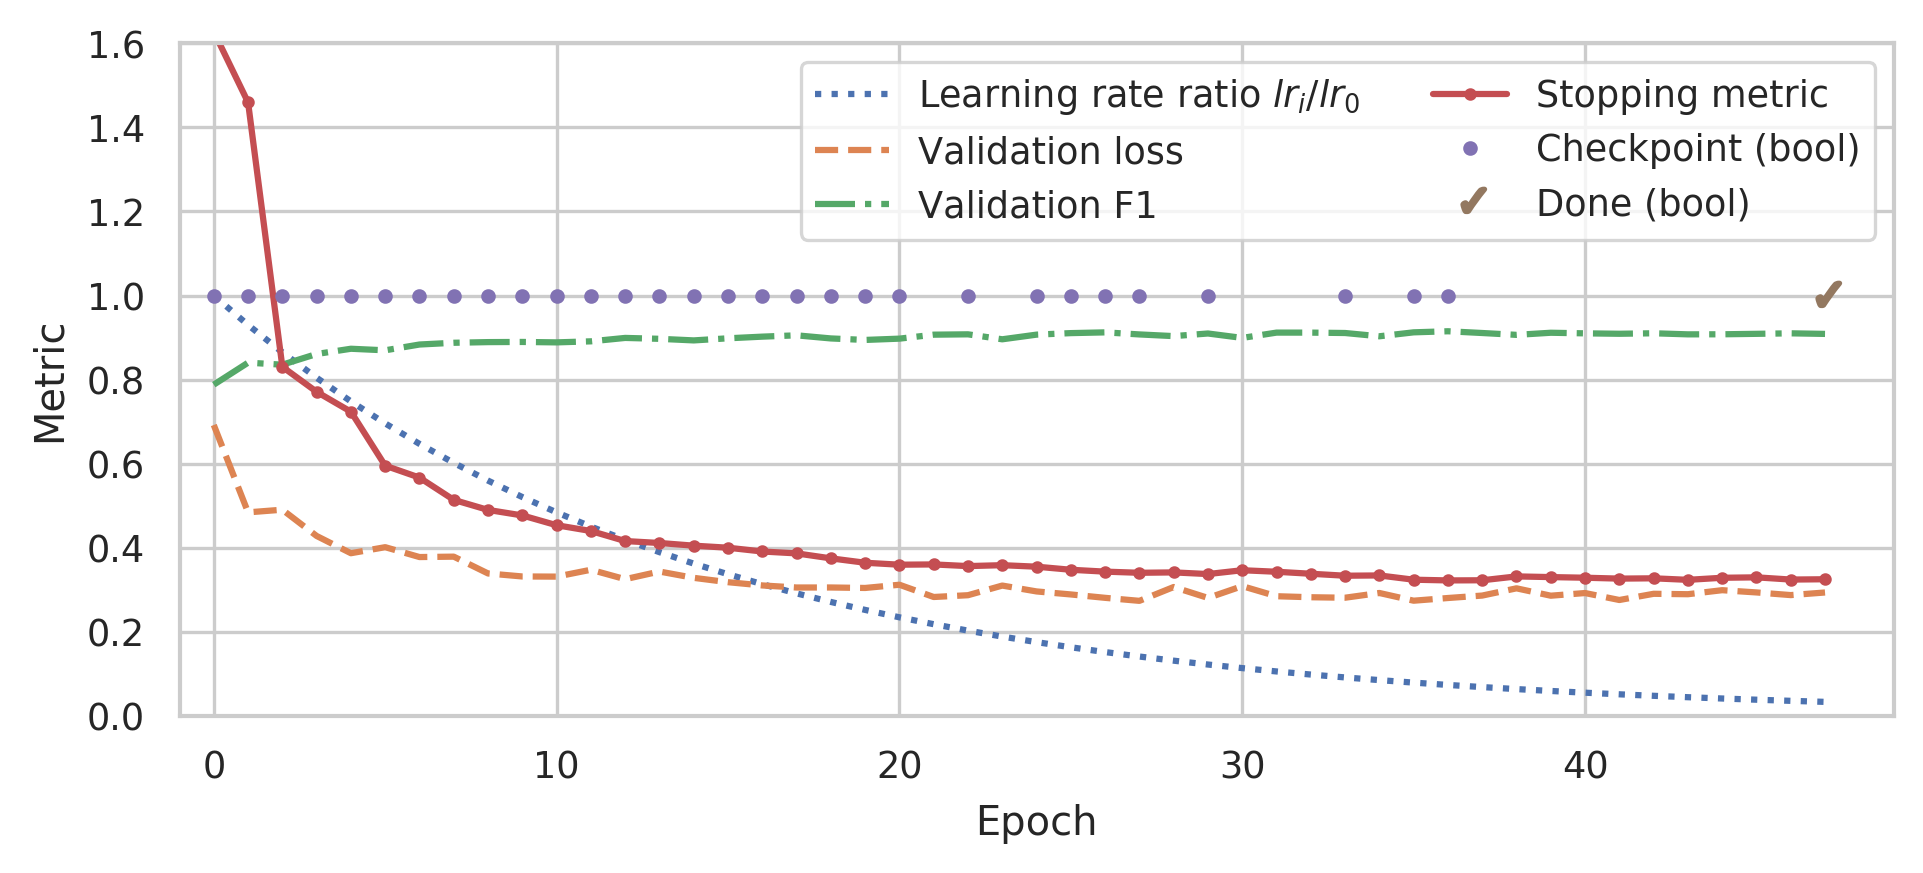

In [63]:
###
# Plot for paper

figure(figsize=[6.5, 3.0], dpi=300)
ax = gca()
ddf = df.loc[:, ["val_loss", "val_f1", "stopping_metric",]]
ddf["lr_ratio"] = 1.0 * 0.93 ** ddf.index
ddf2 = df.loc[:, ["should_checkpoint", "done"]].astype(float)
# ddf.plot(ax=ax)
ddf.lr_ratio.plot(linewidth=1.5, linestyle="dotted")  # style=".", markersize=4,
ddf.val_loss.plot(linewidth=1.5, linestyle="dashed")  # marker=3, markersize=3,
ddf.val_f1.plot(linewidth=1.5, linestyle="dashdot")  # marker=2, markersize=3,
ddf.stopping_metric.plot(marker=".", markersize=4, linewidth=1.5, linestyle="-")
ddf2.should_checkpoint[ddf2.should_checkpoint.astype(bool)].plot(
    marker=".", markersize=5, linestyle="", ax=ax
)
ddf2.done[ddf2.done.astype(bool)].plot(
    marker="$\checkmark$", ax=ax, linestyle="", markersize=7
)
xlim([-1, df.index.max() + 2])
ylim([0, 1.6])
legend(
    [
        "Learning rate ratio $lr_i$/$lr_0$",
        "Validation loss",
        "Validation F1",
        "Stopping metric",
        "Checkpoint (bool)",
        "Done (bool)",
    ],
    ncol=2,
)
# title("Example Training History")
ylabel("Metric")
xlabel("Epoch")
tight_layout()
plt.savefig("training_history.png")
plt.show()
pass